In [2]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import os 
from datetime import datetime
from datetime import time
import dateutil

#read in csv data
path = "Resources/project_data_final.csv"
df = pd.read_csv(path)
#drop unnamed columns
df = df.drop(columns=['Unnamed: 0'])
#inspect the data
df.head()

/Users/fullguest/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Project Number,City,Zip Code,Sector,Electric Utility,Purchase Type,Project Status,Date Application Received,Date Completed,Project Cost,...,education_associates,education_bachelors,education_masters,education_professional,education_doctorate,Date Application Received Int,Date Completed Int,Project Days Int,Completed Year,Completed Month
0,4260-88892,Three Mile Bay,13693,Residential,National Grid,Purchase,Complete,2016-02-01,2016-09-21,29680.00,...,24.0,57.0,17.0,0.0,0.0,1454313600,1474441200,232,2016,9
1,89350,Queens,11434,Residential,Consolidated Edison,Lease,Complete,2017-05-30,2017-07-25,30791.25,...,3576.0,5680.0,2599.0,318.0,83.0,1496127600,1500966000,56,2017,7
2,93198,Bronx,10456,Residential,Consolidated Edison,Lease,Complete,2017-07-19,2017-09-20,13906.00,...,2522.0,3906.0,1054.0,242.0,50.0,1500447600,1505890800,63,2017,9
3,2011-157041-SLPR,Old Field,11733,Residential,PSEG Long Island,Purchase,Complete,2005-10-09,2005-10-09,NaN,...,850.0,2762.0,2489.0,984.0,950.0,1128841200,1128841200,0,2005,10
4,2011-158360-SLPR,Medford,11763,Residential,PSEG Long Island,Purchase,Complete,2009-04-23,2009-04-23,136952.00,...,2091.0,2898.0,1552.0,96.0,125.0,1240470000,1240470000,0,2009,4


In [23]:
#transform date_completed to date_time object
df['Date Completed'] = pd.to_datetime(df['Date Completed'])
dates = df['Date Completed']

#create a variable to hold the formatted datetime strings
y_m = []

#format datetime as a string with year month
for date in dates:
    y_m.append(date.strftime('%Y-%m'))
    
df['Year-Month'] = y_m

#inspect data
df.head()

#df.dtypes

,Project Number,City,Zip Code,Sector,Electric Utility,Purchase Type,Project Status,Date Application Received,Date Completed,Project Cost,...,education_bachelors,education_masters,education_professional,education_doctorate,Date Application Received Int,Date Completed Int,Project Days Int,Completed Year,Completed Month,Year-Month
0,4260-88892,Three Mile Bay,13693,Residential,National Grid,Purchase,Complete,2016-02-01,2016-09-21,29680.00,...,57.0,17.0,0.0,0.0,1454313600,1474441200,232,2016,9,2016-09
1,89350,Queens,11434,Residential,Consolidated Edison,Lease,Complete,2017-05-30,2017-07-25,30791.25,...,5680.0,2599.0,318.0,83.0,1496127600,1500966000,56,2017,7,2017-07
2,93198,Bronx,10456,Residential,Consolidated Edison,Lease,Complete,2017-07-19,2017-09-20,13906.00,...,3906.0,1054.0,242.0,50.0,1500447600,1505890800,63,2017,9,2017-09
3,2011-157041-SLPR,Old Field,11733,Residential,PSEG Long Island,Purchase,Complete,2005-10-09,2005-10-09,NaN,...,2762.0,2489.0,984.0,950.0,1128841200,1128841200,0,2005,10,2005-10
4,2011-158360-SLPR,Medford,11763,Residential,PSEG Long Island,Purchase,Complete,2009-04-23,2009-04-23,136952.00,...,2898.0,1552.0,96.0,125.0,1240470000,1240470000,0,2009,4,2009-04


In [24]:
#keep only columns in new data frame needed for analysis
analysis_df = df[['Year-Month', 'Sector','Purchase Type',  
                  'Zip Code','Project Cost', '$Incentive',
                  'income_per_capital', 'median_monthly_owner_costs',
                  'Electric Utility', 'Total Nameplate kW DC',
                  '$_per_watt_wincentives', '$_per_watt',
                  'Completed Year', 'Completed Month','Date Completed']]

#sort values by ascending year
analysis_df = analysis_df.sort_values('Date Completed', ascending=True).reset_index()

# define function to calculate percent of cost covered by incentives per project
def calculate_incentive_ratio(row):
    if (row['Project Cost'] == 0):
         return ("NaN")
    else:
         return (row['$Incentive']/ row['Project Cost'])*100
      
analysis_df['% Covered by Incentives'] = analysis_df.apply(calculate_incentive_ratio, axis=1)
# Use apply to save the new column and apply to each row by specifying axis=1 



In [25]:
from collections import Counter
l = (analysis_df['Completed Year'])
Counter(l)
counter = Counter({2016: 20479, 2015: 18308, 2017: 13582, 2014: 9419, 2013: 4372, 2018: 4262, 2012: 3168, 2010: 2330, 2011: 2201, 2009: 1582, 2008: 935, 2007: 650, 2006: 452, 2005: 231, 2004: 228, 2003: 185, 2002: 184, 2001: 13, 2000: 2})
counter.most_common()
perspective_df = sorted(counter.items())
#print(Counter(l))

#Counter({2016: 20479, 2015: 18308, 2017: 13582, 2014: 9419, 2013: 4372, 2018: 4262, 2012: 3168, 2010: 2330, 2011: 2201, 2009: 1582, 2008: 935, 2007: 650, 2006: 452, 
#2005: 231, 2004: 228, 2003: 185, 2002: 184, 2001: 13, 2000: 2})

In [26]:
# Create purchase data frame
purchase_data = analysis_df[analysis_df['Purchase Type'] == 'Purchase']
purchase_data_grouped = purchase_data.groupby(['Completed Year']).agg(
                        {
                            'Purchase Type': ['count'],    
                            '% Covered by Incentives': ['mean'] 
                        }   
                    ).reset_index()


percent_covered_type_purchase = purchase_data_grouped['% Covered by Incentives']['mean']
count_type_purchase = purchase_data_grouped['Purchase Type']['count']
years_type_purchase = purchase_data_grouped['Completed Year']

# Lease
lease_data = analysis_df[analysis_df['Purchase Type'] == 'Lease']
lease_data_grouped = lease_data.groupby(['Completed Year']).agg(
                        {
                            'Purchase Type': ['count'],    
                            '% Covered by Incentives': ['mean'] 
                        }   
                    ).reset_index()


percent_covered_type_lease = lease_data_grouped['% Covered by Incentives']['mean']
count_type_lease = lease_data_grouped['Purchase Type']['count']
years_type_lease = lease_data_grouped['Completed Year']

# Power Purchase Agreement
power_data = analysis_df[analysis_df['Purchase Type'] == 'Power Purchase Agreement']
power_data_grouped = power_data.groupby(['Completed Year']).agg(
                        {
                            'Purchase Type': ['count'],    
                            '% Covered by Incentives': ['mean'] 
                        }   
                    ).reset_index()


percent_covered_type_power = power_data_grouped['% Covered by Incentives']['mean']
count_type_power = power_data_grouped['Purchase Type']['count']
years_type_power = power_data_grouped['Completed Year']

TypeError: text() missing 1 required positional argument: 's'

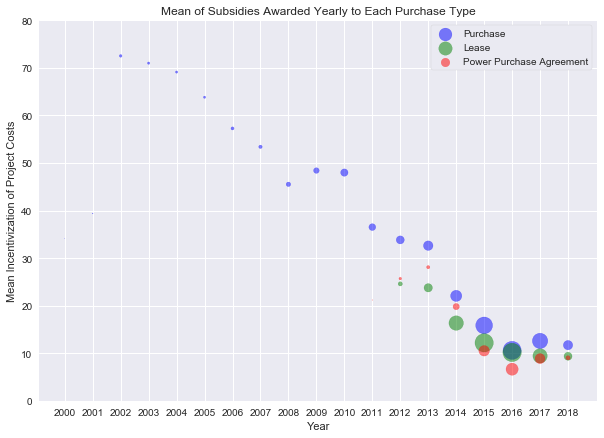

In [27]:
# Get current size
from pylab import rcParams
fig_size = plt.rcParams["figure.figsize"]


# Prints: [8.0, 6.0]
#print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

sns.set_style('dark')
sns.set()
normalize_factor = 25
plt.scatter(years_type_purchase, percent_covered_type_purchase, count_type_purchase / normalize_factor, color='blue', label = 'Purchase', alpha=.5)
plt.scatter(years_type_lease, percent_covered_type_lease, count_type_lease / normalize_factor, color='green', label = 'Lease', alpha=.5)
plt.scatter(years_type_power, percent_covered_type_power, count_type_power / normalize_factor, color='red', label = 'Power Purchase Agreement', alpha=.5)

plt.xticks(np.arange(min(years_type_purchase), max(years_type_purchase)+1, 1.0))

#plt.scatter(years, agreement_percent, agreement_count, color='blue')

plt.xlabel('Year')
plt.ylabel('Mean Incentivization of Project Costs')
plt.title('Mean of Subsidies Awarded Yearly to Each Purchase Type')
plt.ylim(0, 80)
plt.legend(framealpha=1, loc='best', frameon=True)

plt.text(10, -10, wrap = True )

#plt.scatter(years, Y3, s=area, c=colors, alpha=0.5)
# plt.savefig('pt_ratios_by_year.png', dpi = (200))

plt.show()
plt.tight_layout()
plt.savefig("incent_by_year.png")

/Users/fullguest/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


TypeError: invalid type promotion

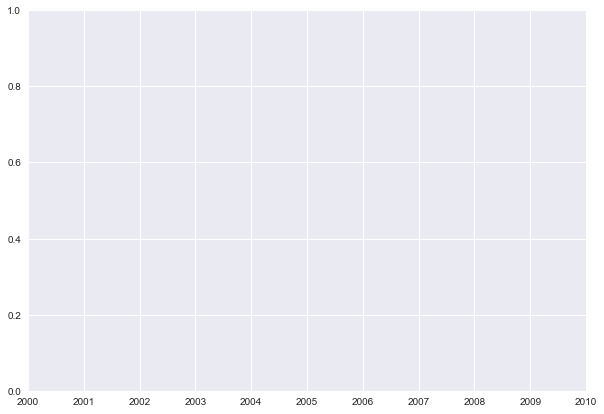

In [36]:
#DEFINE THE DATAFRAME
kwh_df = analysis_df[['Year-Month', 'Sector','Purchase Type',
                     '$_per_watt_wincentives', '$_per_watt', 
                     'Completed Year']]
kwh_df['Year-Month'] = pd.to_datetime(kwh_df['Year-Month'], yearfirst=True)


# kwh_df['$_per_watt_wincentives'] = kwh_df['$_per_watt_wincentives'].replace({(0) : 'NaN'})
# kwh_df['$_per_watt'] = kwh_df['$_per_watt'].replace({(0) : 'NaN'})
# kwh_df.dropna(how = 'any', inplace = True)

kwh_df_grouped = kwh_df.groupby(['Year-Month', 'Sector', 'Purchase Type']).agg(
                        {   'Purchase Type': ['count'],
                            '$_per_watt_wincentives': ['mean'], 
                            '$_per_watt': ['mean'],
                        }).reset_index()
kwh_df_grouped = pd.DataFrame(kwh_df_grouped)

#inspect data
df.head()
#kwh_df_grouped.describe()

#SORT and GROUP the DATAFRAME
# RESIDENTIAL
sns.set_style('dark')
sns.set()
size = np.log(kwh_df_grouped['Purchase Type']['count'])

#assign variables to clean code
kwh_res_df = kwh_df_grouped.loc[kwh_df_grouped['Sector'] == "Residential"]

kwh_non_res_df = kwh_df_grouped.loc[kwh_df_grouped['Sector'] == "Non-Residential"] 

#plot
plt.scatter(kwh_res_df['Year-Month'], kwh_res_df['$_per_watt'], s = size, alpha = 0.5, color = 'red', edgecolors='black', label = "Residential")
plt.scatter(kwh_non_res_df['Year-Month'], kwh_non_res_df['$_per_watt'], s = size, alpha = 0.5, color = 'blue', edgecolors='black', label = "Non-Residential")
plt.title('Mean Cost Per Watt Over Y-M')
plt.ylim(0, 15)
plt.ylabel('Average Cost Per Watt')
plt.xlabel('Completed Year-Month')
plt.legend()
plt.show()


# #kwh_df_grouped=pd.DataFrame({'x': range(2000,2018), 'y': np.random.randn(100)*15+range(1,101), 'z': (np.random.randn(100)*15+range(1,101))*10 })



# sorted_analy = analysis_df.sort_values('$_per_watt', ascending=False)

# # analysis_df = analysis_df.sort_values('Date Completed', ascending=True).reset_index()

# # # define function to calculate percent of cost covered by incentives per project
# # def calculate_incentive_ratio(row):
# #     if (row['Project Cost'] == 0):
# #          return ("NaN")
# #     else:
# #          return (row['$Incentive']/ row['Project Cost'])*100
      
# # analysis_df['% Covered by Incentives'] = analysis_df.apply(calculate_incentive_ratio, axis=1)





#max $300      282.76
#min -0.5

#initialise the figure. here we share X and Y axis
# fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
# axes[0].plot( 'x', 'y', data=df, marker='^', color="blue" alpha=0.4)
# axes[1].plot( 'x','z', data=df, linestyle='none', marker='o', color="orange", alpha=0.3)
# axes[0].title.set_text('')
# plt.show()





/Users/fullguest/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


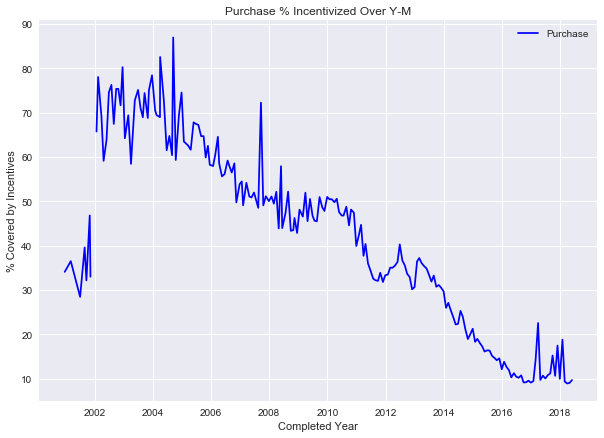

In [29]:
purchase_cost_df = analysis_df.loc[analysis_df['Purchase Type'] == 'Purchase']

#% of incentive to project cost
purchase_cost_df['Incentive Ratio'] = (purchase_cost_df['$Incentive']/purchase_cost_df['Project Cost'])*100
purchase_cost_df_grouped = purchase_cost_df.groupby('Year-Month')
purchase_cost_df_date_grouped = purchase_cost_df_grouped['Date Completed'].max()
purchase_cost_df_date_grouped = purchase_cost_df_date_grouped.to_frame()

purchase_cost_df_inratio_grouped = purchase_cost_df_grouped['Incentive Ratio'].mean()
purchase_cost_df_inratio_grouped = purchase_cost_df_inratio_grouped.to_frame()

merge = purchase_cost_df_inratio_grouped.merge(purchase_cost_df_date_grouped, left_index=True, right_index=True)
merge.head()


plt.plot(merge['Date Completed'], merge['Incentive Ratio'], color='b', label = 'Purchase')
plt.title('Purchase % Incentivized Over Y-M')
plt.ylabel('% Covered by Incentives')
plt.xlabel('Completed Year')
plt.legend()
plt.show()


/Users/fullguest/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


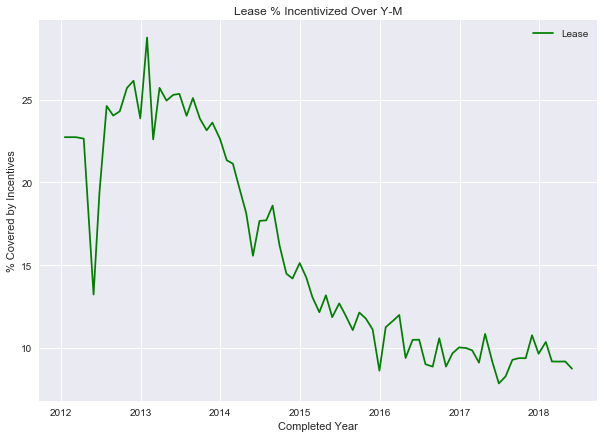

In [30]:
lease_cost_df = analysis_df.loc[analysis_df['Purchase Type'] == 'Lease']

#% of incentive to project cost
lease_cost_df['Incentive Ratio'] = (lease_cost_df['$Incentive']/lease_cost_df['Project Cost'])*100
lease_cost_df_grouped = lease_cost_df.groupby('Year-Month')
lease_cost_df_date_grouped = lease_cost_df_grouped['Date Completed'].max()
lease_cost_df_date_grouped = lease_cost_df_date_grouped.to_frame()

lease_cost_df_inratio_grouped = lease_cost_df_grouped['Incentive Ratio'].mean()
lease_cost_df_inratio_grouped = lease_cost_df_inratio_grouped.to_frame()

merge = lease_cost_df_inratio_grouped.merge(lease_cost_df_date_grouped, left_index=True, right_index=True)
merge.head()

plt.plot(merge['Date Completed'], merge['Incentive Ratio'], color='g',label = 'Lease')
plt.ylabel('% Covered by Incentives')
plt.xlabel('Completed Year')
plt.title('Lease % Incentivized Over Y-M')
plt.legend()
plt.show()



/Users/fullguest/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


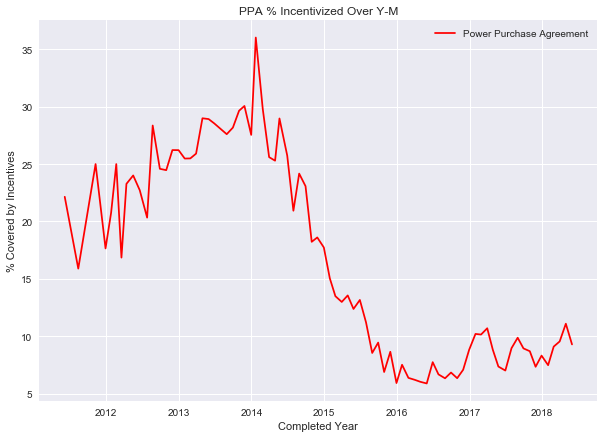

In [31]:
ppa_cost_df = analysis_df.loc[analysis_df['Purchase Type'] == 'Power Purchase Agreement']

#% of incentive to project cost
ppa_cost_df['Incentive Ratio'] = (ppa_cost_df['$Incentive']/ppa_cost_df['Project Cost'])*100
ppa_cost_df_grouped = ppa_cost_df.groupby('Year-Month')
ppa_cost_df_date_grouped = ppa_cost_df_grouped['Date Completed'].max()
ppa_cost_df_date_grouped = ppa_cost_df_date_grouped.to_frame()

ppa_cost_df_inratio_grouped = ppa_cost_df_grouped['Incentive Ratio'].mean()
ppa_cost_df_inratio_grouped = ppa_cost_df_inratio_grouped.to_frame()

merge = ppa_cost_df_inratio_grouped.merge(ppa_cost_df_date_grouped, left_index=True, right_index=True)
merge.head()


plt.plot(merge['Date Completed'], merge['Incentive Ratio'], color='r', label = 'Power Purchase Agreement')
plt.ylabel('% Covered by Incentives')
plt.xlabel('Completed Year')
plt.title('PPA % Incentivized Over Y-M')
plt.legend()
plt.show()